# Import Libraries

**Import the libraries you usually use for data analysis.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

# Get the Data

**private**

A factor with levels No and Yes indicating private or public university


**apps**	

Number of applications received


**accept**

Number of applications accepted


**enroll**

Number of new students enrolled


**top10perc**

Pct. new students from top 10% of H.S. class


**top25perc**

Pct. new students from top 25% of H.S. class


**f_undergrad**	

Number of full-time undergraduates


**p_undergrad**

Number of part time undergraduates


**outstate**

Out-of-state tuition (biaya kuliah yang dikenakan kepada mahasiswa yang berasal dari luar negara)


**room_board**

Room and board costs


**books**

Estimated book costs


**personal**

Estimated personal spending


**phd**

Pct. of faculty with Ph.D.’s


**terminal**

Pct. of faculty with terminal degree


**s_f_ratio**

Student/faculty ratio


**perc_alumni**

Pct. alumni who donate


**expend**

Instructional expenditure per student


**grad_rate**

Graduation rate

In [2]:
data = pd.read_csv("data.csv")
data.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


**Check the info() and describe() methods on the data.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   private      777 non-null    object 
 1   apps         777 non-null    int64  
 2   accept       777 non-null    int64  
 3   enroll       777 non-null    int64  
 4   top10perc    777 non-null    int64  
 5   top25perc    777 non-null    int64  
 6   f_undergrad  777 non-null    int64  
 7   p_undergrad  777 non-null    int64  
 8   outstate     777 non-null    int64  
 9   room_board   777 non-null    int64  
 10  books        777 non-null    int64  
 11  personal     777 non-null    int64  
 12  phd          777 non-null    int64  
 13  terminal     777 non-null    int64  
 14  s_f_ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  expend       777 non-null    int64  
 17  grad_rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [4]:
pd.set_option('display.float', '{:.2f}'.format)
data.describe()

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
count,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00
mean,3001.64,2018.80,779.97,27.56,55.80,3699.91,855.30,10440.67,4357.53,549.38,1340.64,72.66,79.70,14.09,22.74,9660.17,65.46
std,3870.20,2451.11,929.18,17.64,19.80,4850.42,1522.43,4023.02,1096.70,165.11,677.07,16.33,14.72,3.96,12.39,5221.77,17.18
min,81.00,72.00,35.00,1.00,9.00,139.00,1.00,2340.00,1780.00,96.00,250.00,8.00,24.00,2.50,0.00,3186.00,10.00
25%,776.00,604.00,242.00,15.00,41.00,992.00,95.00,7320.00,3597.00,470.00,850.00,62.00,71.00,11.50,13.00,6751.00,53.00
50%,1558.00,1110.00,434.00,23.00,54.00,1707.00,353.00,9990.00,4200.00,500.00,1200.00,75.00,82.00,13.60,21.00,8377.00,65.00
75%,3624.00,2424.00,902.00,35.00,69.00,4005.00,967.00,12925.00,5050.00,600.00,1700.00,85.00,92.00,16.50,31.00,10830.00,78.00
max,48094.00,26330.00,6392.00,96.00,100.00,31643.00,21836.00,21700.00,8124.00,2340.00,6800.00,103.00,100.00,39.80,64.00,56233.00,118.00


# Exploratory Data Analysis (EDA)

<Axes: xlabel='outstate', ylabel='f_undergrad'>

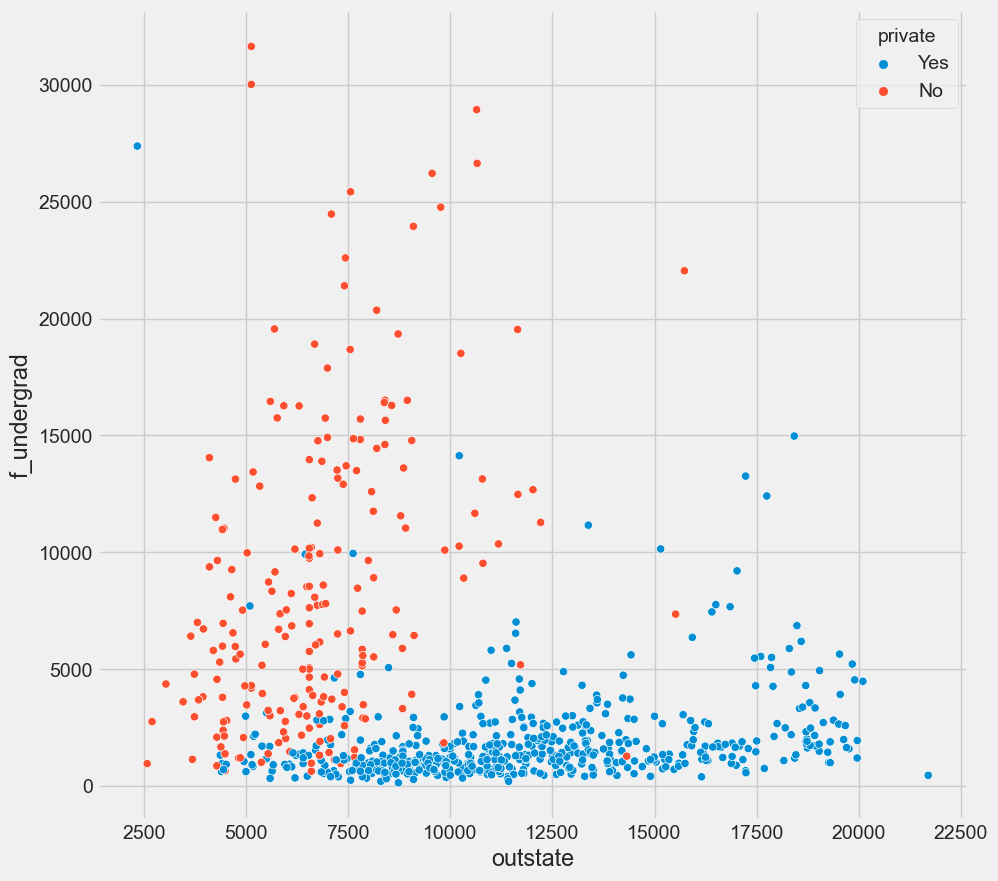

In [5]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='outstate', y='f_undergrad', data=data, hue='private')

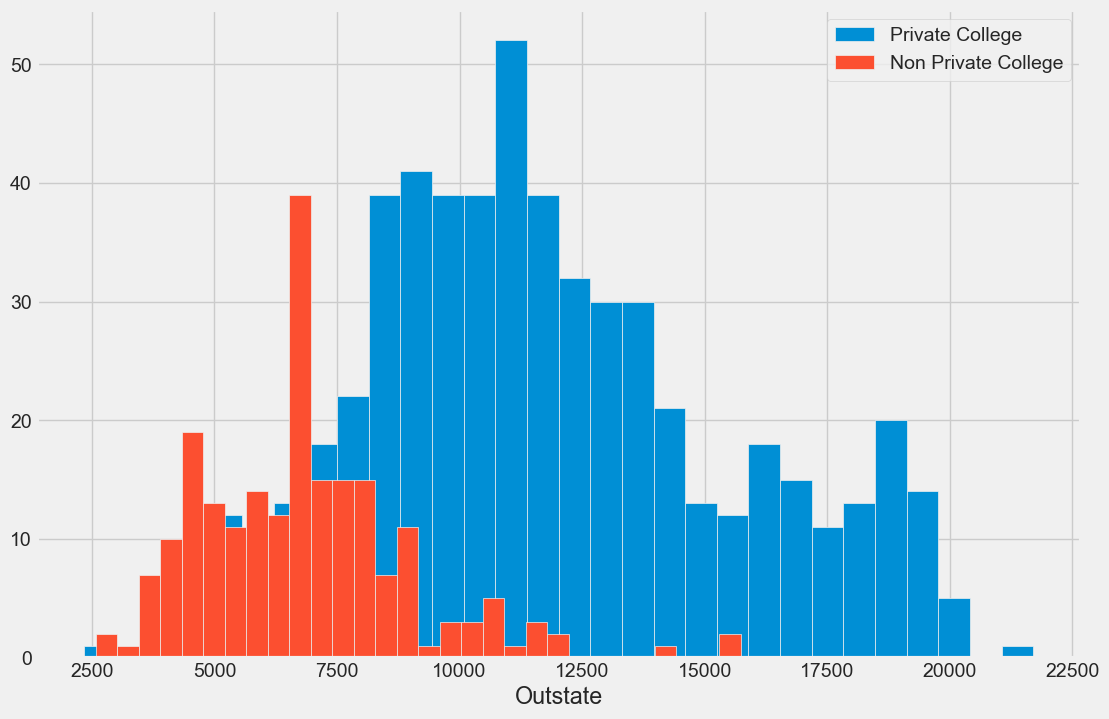

In [6]:
plt.figure(figsize=(12, 8))

data.loc[data.private == 'Yes', 'outstate'].hist(label="Private College", bins=30)
data.loc[data.private == 'No', 'outstate'].hist(label="Non Private College", bins=30)

plt.xlabel('Outstate')
plt.legend()

**Create a similar histogram for the Grad.Rate column.**

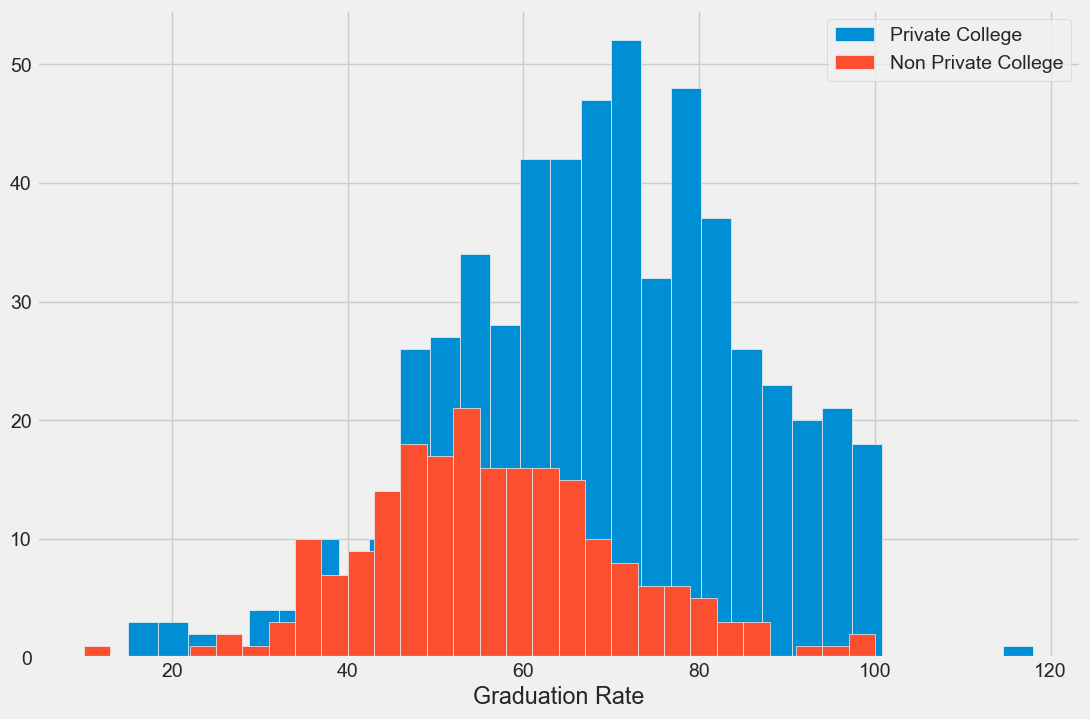

In [7]:
plt.figure(figsize=(12, 8))

data.loc[data.private == 'Yes', 'grad_rate'].hist(label="Private College", bins=30)
data.loc[data.private == 'No', 'grad_rate'].hist(label="Non Private College", bins=30)

plt.xlabel('Graduation Rate')
plt.legend()

**Notice how there seems to be a private school with a graduation rate of higher than 100%.What is the name of that school?**

In [8]:
data.loc[data.grad_rate > 100]

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
95,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.30,20,7697,118


In [9]:
data.loc[data.grad_rate > 100, 'grad_rate'] = 100

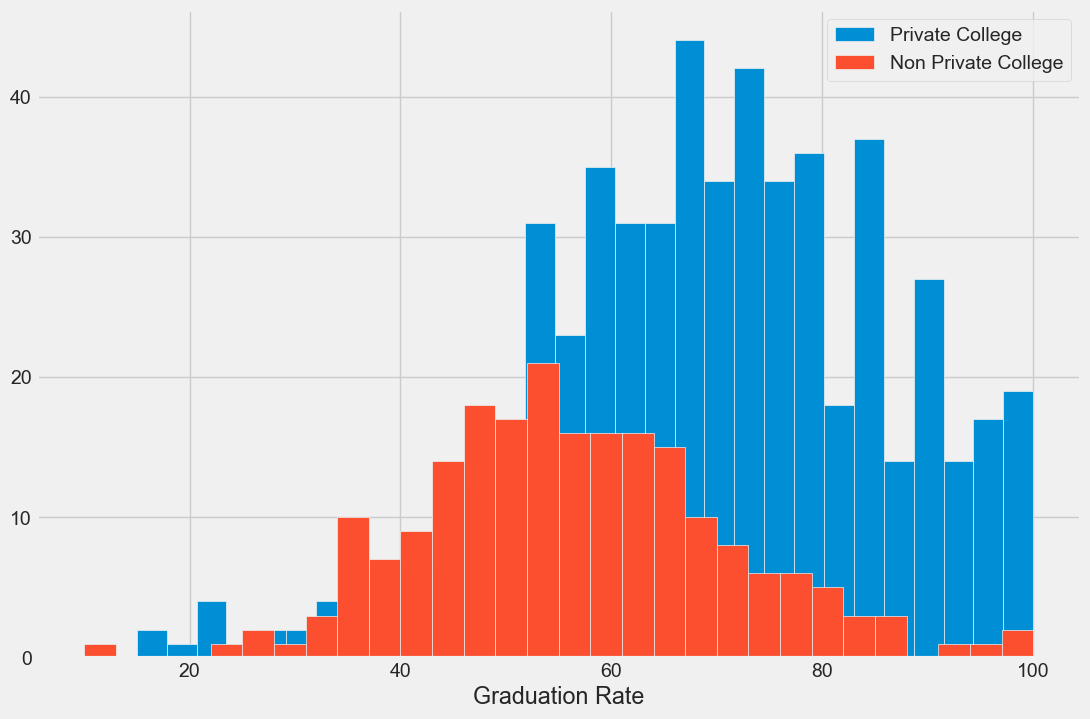

In [10]:
plt.figure(figsize=(12, 8))

data.loc[data.private == 'Yes', 'grad_rate'].hist(label="Private College", bins=30)
data.loc[data.private == 'No', 'grad_rate'].hist(label="Non Private College", bins=30)

plt.xlabel('Graduation Rate')
plt.legend()

<Axes: xlabel='private', ylabel='outstate'>

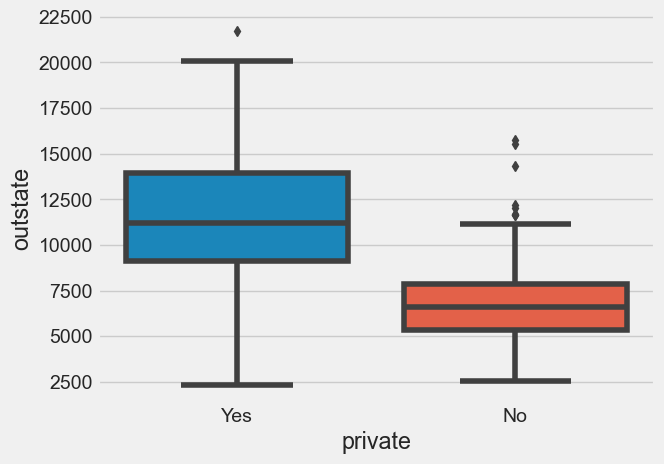

In [11]:
sns.boxplot(x='private',y='outstate',data=data)

# K Means Cluster Creation

Now it is time to create the Cluster labels!

**Import KMeans from SciKit Learn.**

In [12]:
from sklearn.cluster import KMeans

**Create an instance of a K Means model with 2 clusters.**

In [13]:
kmeans = KMeans(2)

**Fit the model to all the data except for the Private label.**

In [14]:
kmeans.fit(data.drop('private', axis=1))

KMeans(n_clusters=2)

**What are the cluster center vectors?**

In [15]:
kmeans.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01]])

# Evaluation


**Create a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.**

In [16]:
data['private'] = data.private.astype("category").cat.codes

In [17]:
data.private

0      1
1      1
2      1
3      1
4      1
      ..
772    0
773    1
774    1
775    1
776    1
Name: private, Length: 777, dtype: int8

In [18]:
data.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.10,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.20,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.90,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.70,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.90,2,10922,15


In [19]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

**1 = Privat(Yes)**

**0 = Public(No)**

In [20]:
df = data.drop('private', axis=1)
# Initialize the PCA model with the desired number of components
pca = PCA(n_components=2)
# Fit and transform the data
data_pca = pca.fit_transform(df)
data_pca

array([[-2551.83789358, -3445.94714206],
       [ -743.72950982,  2227.36358621],
       [-3373.55620703,   674.25254546],
       ...,
       [-1838.20688263, -2662.64940963],
       [15023.18693162, 27968.56072352],
       [-2286.58226424, -6915.50720277]])

In [21]:
# Membuat DataFrame dari data PCA
df_pca = pd.DataFrame(data_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Menampilkan DataFrame hasil PCA
df_pca

,Principal Component 1,Principal Component 2
0,-2551.84,-3445.95
1,-743.73,2227.36
2,-3373.56,674.25
3,-1436.83,9838.72
4,-4413.84,546.42
...,...,...
772,-2667.84,-5868.43
773,-1271.92,608.81
774,-1838.21,-2662.65
775,15023.19,27968.56


In [22]:
df_pca['private']=data['private']
df_pca['cluster']=kmeans.labels_

## Real Data

<Axes: xlabel='Principal Component 1', ylabel='Principal Component 2'>

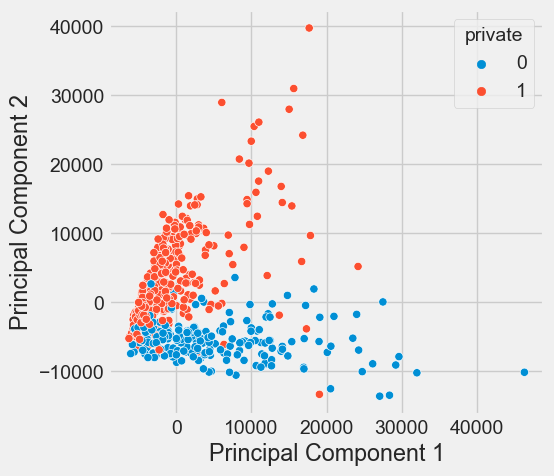

In [23]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='Principal Component 1',y='Principal Component 2', data=df_pca, hue='private')

## Predict Data

<Axes: xlabel='Principal Component 1', ylabel='Principal Component 2'>

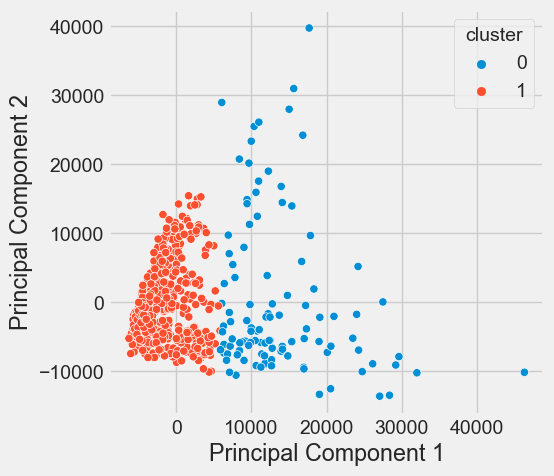

In [24]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='Principal Component 1',y='Principal Component 2', data=df_pca, hue='cluster')

**Create a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.**

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(data.private, kmeans.labels_))
print(classification_report(data.private, kmeans.labels_))

[[ 74 138]
 [ 34 531]]
              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(data.private, kmeans.labels_))
print(pd.DataFrame(classification_report(data.private, kmeans.labels_, output_dict=True)))

0.7786357786357786
               0      1  accuracy  macro avg  weighted avg
precision   0.69   0.79      0.78       0.74          0.76
recall      0.35   0.94      0.78       0.64          0.78
f1-score    0.46   0.86      0.78       0.66          0.75
support   212.00 565.00      0.78     777.00        777.00


# Scaling the data

In [27]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = data.drop('private', axis=1)
y = data.private

X = scalar.fit_transform(X)

kmeans = KMeans(2)
kmeans.fit(X)

print(kmeans.cluster_centers_)

print(accuracy_score(y, kmeans.labels_))
print(confusion_matrix(y, kmeans.labels_))
print(classification_report(y, kmeans.labels_))

[[-0.32661962 -0.30530339 -0.25143507 -0.49913749 -0.50267293 -0.22105053
  -0.03848678 -0.45792911 -0.37283453 -0.12172587  0.04875211 -0.49062908
  -0.47906195  0.23583839 -0.30713916 -0.42464126 -0.36177249]
 [ 0.54548844  0.50988814  0.41992248  0.83361106  0.83951561  0.36917718
   0.06427689  0.76478882  0.6226721   0.20329475 -0.08142105  0.81940114
   0.80008284 -0.39387442  0.51295406  0.70919469  0.60419735]]
0.4774774774774775
[[146  66]
 [340 225]]
              precision    recall  f1-score   support

           0       0.30      0.69      0.42       212
           1       0.77      0.40      0.53       565

    accuracy                           0.48       777
   macro avg       0.54      0.54      0.47       777
weighted avg       0.64      0.48      0.50       777



In [28]:
df = data
df['private_predict']=kmeans.labels_

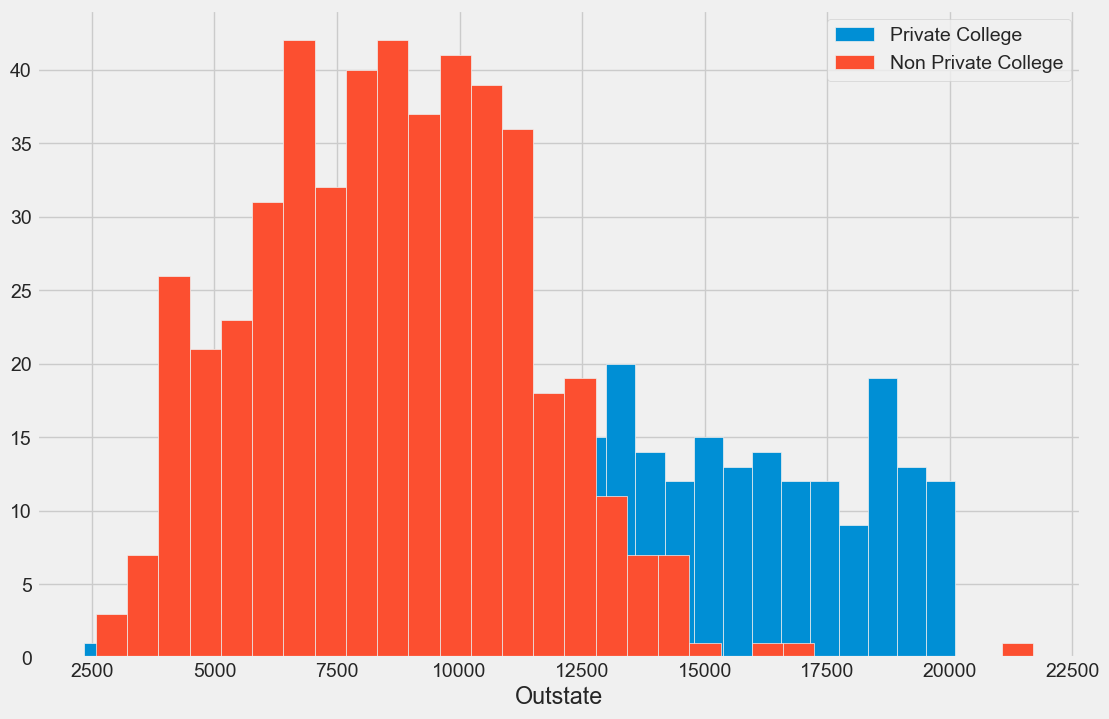

In [29]:
plt.figure(figsize=(12, 8))

df.loc[df.private_predict == 1, 'outstate'].hist(label="Private College", bins=30)
df.loc[df.private_predict == 0, 'outstate'].hist(label="Non Private College", bins=30)

plt.xlabel('Outstate')
plt.legend()

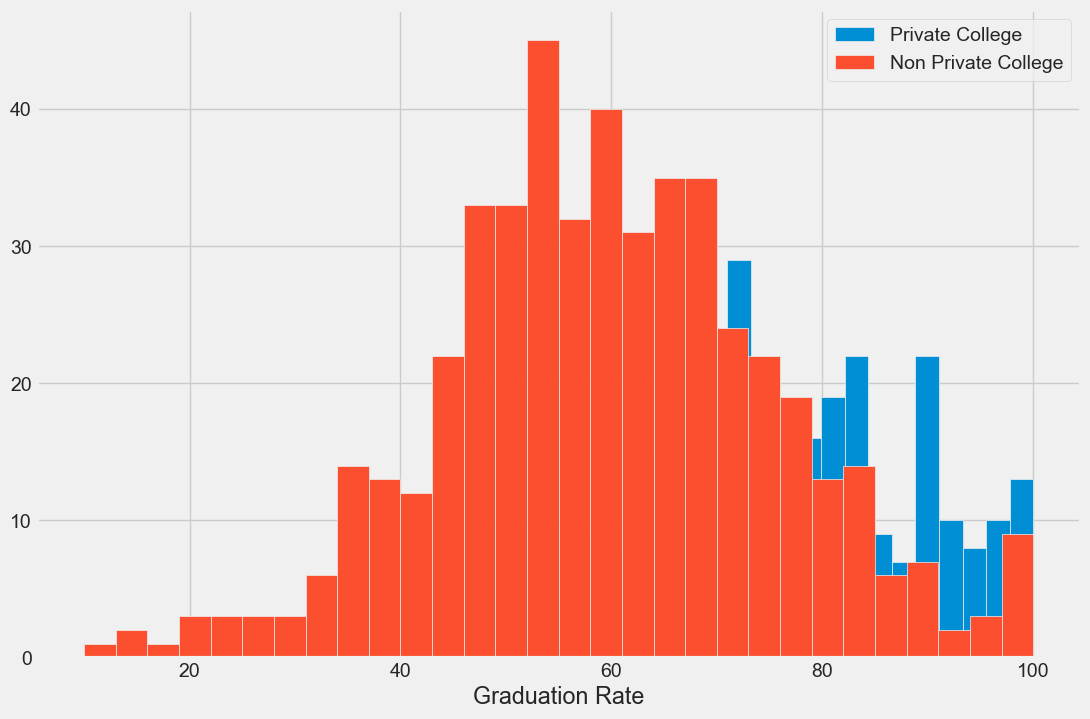

In [30]:
plt.figure(figsize=(12, 8))

df.loc[df.private_predict == 1, 'grad_rate'].hist(label="Private College", bins=30)
df.loc[df.private_predict == 0, 'grad_rate'].hist(label="Non Private College", bins=30)

plt.xlabel('Graduation Rate')
plt.legend()

<Axes: xlabel='private_predict', ylabel='outstate'>

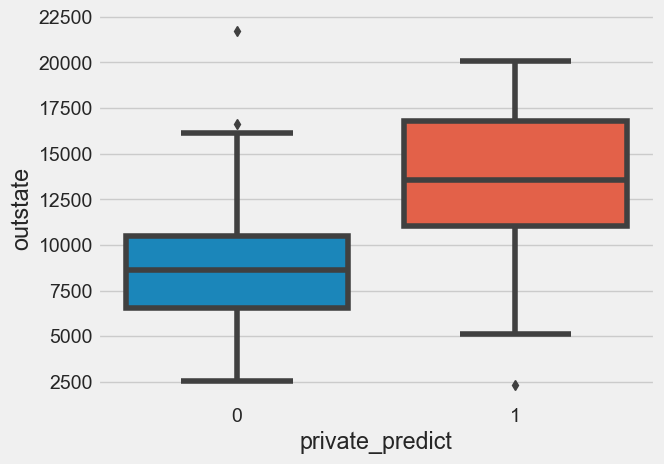

In [31]:
sns.boxplot(x='private_predict',y='outstate',data=df)